## Goal: Check various hypothesis

In [114]:
import pandas as pd
import pypsa
prefix = "/mnt/c/Users/scl38887/Documents/git/aldehyde"

### Check 1: Compare with / without network

In [115]:
# Total system cost
runs = ["h2network_true", "h2network_false", "test_subworkflow"]

stats = pd.DataFrame(columns=runs, index=["H2", "AC", "total costs"])

for run in runs:
    metrics = pd.read_csv(prefix + "/workflow/subworkflows/pypsa-earth-sec/results/" + run + "/csvs/metrics.csv", header=[0,1,2,3,4,5,6], index_col=0)
    prices = pd.read_csv(prefix + "/workflow/subworkflows/pypsa-earth-sec/results/" + run + "/csvs/prices.csv", header=[0,1,2,3,4,5,6], index_col=0)

    stats.loc["H2", run] = prices.loc["H2"].values[0]
    stats.loc["AC", run] = prices.loc["AC"].values[0]
    stats.loc["total costs", run] = metrics.loc["total costs"].values[0]/1e9 # in B€


In [116]:
stats.head()

,h2network_true,h2network_false,test_subworkflow
H2,58.79,62.39,53.809
AC,46.937,47.61,41.976
total costs,18.785888,18.81631,8.511328


### Check 2: Hydrogen & battery storage

In [117]:
run = "h2network_true_3h"
export_only = prefix +"/resources/export_only/" + run +"/elec_s_10_ec_lc1.0_Co2L0.10_3H_2030_0.071_DF_120export_solved.nc"
mar_only =prefix + "/resources/pypsaearthsec/" + run + "/postnetworks/elec_s_10_ec_lc1.0_Co2L0.10_3H_2030_0.071_DF_0export.nc"
mar_es_export =prefix + "/resources/pypsaearthsec/" + run + "/postnetworks/elec_s_10_ec_lc1.0_Co2L0.10_3H_2030_0.071_DF_120export.nc"
n = pypsa.Network(mar_es_export)

INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.10_3H_2030_0.071_DF_120export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [118]:
n.stores[(n.stores.carrier=="H2") & (n.stores.bus != "H2 export bus")].e_nom_opt.sum() / 1e3 # in GWh

45.99129055208717

In [119]:
n.stores[(n.stores.carrier=="battery")].e_nom_opt.sum() / 1e3 # in GWh

57.95465487169986

In [120]:
n.links[n.links.index.str.contains("H2")]

,bus0,bus1,carrier,efficiency,p_nom_extendable,bus2,bus3,bus4,capital_cost,efficiency2,...,charger_ratio,type,build_year,p_nom_min,p_nom_max,p_set,p_max_pu,terrain_factor,ramp_limit_up,ramp_limit_down
Link,,,,,,,,,,,,,,,,,,,,,
MA.1.1_1_AC H2 Electrolysis,MA.1.1_1_AC,MA.1.1_1_AC H2,H2 Electrolysis,0.68,True,,,,45628.850451,1.0,...,NaN,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN
MA.1.2_1_AC H2 Electrolysis,MA.1.2_1_AC,MA.1.2_1_AC H2,H2 Electrolysis,0.68,True,,,,45628.850451,1.0,...,NaN,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN
MA.1.3_1_AC H2 Electrolysis,MA.1.3_1_AC,MA.1.3_1_AC H2,H2 Electrolysis,0.68,True,,,,45628.850451,1.0,...,NaN,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN
MA.10.1_1_AC H2 Electrolysis,MA.10.1_1_AC,MA.10.1_1_AC H2,H2 Electrolysis,0.68,True,,,,45628.850451,1.0,...,NaN,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN
MA.10.3_1_AC H2 Electrolysis,MA.10.3_1_AC,MA.10.3_1_AC H2,H2 Electrolysis,0.68,True,,,,45628.850451,1.0,...,NaN,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MA.10.4_1_AC H2 export,MA.10.4_1_AC H2,H2 export bus,H2,1.00,True,,,,0.000000,1.0,...,NaN,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN
MA.14.1_1_AC H2 export,MA.14.1_1_AC H2,H2 export bus,H2,1.00,True,,,,0.000000,1.0,...,NaN,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN
MA.14.3_1_AC H2 export,MA.14.3_1_AC H2,H2 export bus,H2,1.00,True,,,,0.000000,1.0,...,NaN,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN


In [121]:
n.links[n.links.index.str.contains("battery")].head()

,bus0,bus1,carrier,efficiency,p_nom_extendable,bus2,bus3,bus4,capital_cost,efficiency2,...,charger_ratio,type,build_year,p_nom_min,p_nom_max,p_set,p_max_pu,terrain_factor,ramp_limit_up,ramp_limit_down
Link,,,,,,,,,,,,,,,,,,,,,
MA.1.1_1_AC battery charger,MA.1.1_1_AC,MA.1.1_1_AC battery,battery charger,0.979796,True,,,,23429.816612,1.0,...,-386.692902,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN
MA.1.2_1_AC battery charger,MA.1.2_1_AC,MA.1.2_1_AC battery,battery charger,0.979796,True,,,,23429.816612,1.0,...,-615.372228,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN
MA.1.3_1_AC battery charger,MA.1.3_1_AC,MA.1.3_1_AC battery,battery charger,0.979796,True,,,,23429.816612,1.0,...,-649.230866,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN
MA.10.1_1_AC battery charger,MA.10.1_1_AC,MA.10.1_1_AC battery,battery charger,0.979796,True,,,,23429.816612,1.0,...,-787.617305,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN
MA.10.3_1_AC battery charger,MA.10.3_1_AC,MA.10.3_1_AC battery,battery charger,0.979796,True,,,,23429.816612,1.0,...,-761.625107,,0,0.0,inf,0.0,1.0,1.0,NaN,NaN


In [135]:
# Show capacities and nodes of top batteries
n.stores[(n.stores.carrier=="battery")].e_nom_opt.sort_values(ascending=False) # head()

Store
MA.12.3_1_AC battery    26833.515818
MA.9.2_1_AC battery     13096.639717
MA.12.4_1_AC battery     7366.838273
MA.13.1_1_AC battery     5532.753789
MA.12.5_1_AC battery     2376.518371
MA.12.7_1_AC battery     1750.844347
MA.8.4_1_AC battery       246.823324
MA.12.1_1_AC battery      169.675836
MA.8.2_1_AC battery        59.379609
MA.8.1_1_AC battery        36.745207
MA.8.3_1_AC battery        28.489891
MA.8.5_1_AC battery        28.145978
MA.2.1_1_AC battery        27.396960
MA.2.2_1_AC battery        26.216234
MA.9.4_1_AC battery        26.063357
MA.1.1_1_AC battery        25.058071
MA.1.3_1_AC battery        20.035815
MA.1.2_1_AC battery        19.736993
MA.13.2_1_AC battery       19.086506
MA.15.2_1_AC battery       14.141331
MA.10.4_1_AC battery       13.990639
MA.10.1_1_AC battery       13.813826
MA.10.3_1_AC battery       13.706842
MA.15.3_1_AC battery       13.538414
MA.11.1_1_AC battery       12.931541
MA.15.1_1_AC battery       12.766737
MA.9.1_1_AC battery        12.37

Retrieve storage sizes of all networks

In [123]:
# Get storage sizes of hydrogen and battery for all networks
run = "h2network_true_3h"
networks = ["export_only", "mar_only", "mar_es_export"]

network_paths = {
        "export_only": prefix +"/resources/export_only/" + run +"/elec_s_10_ec_lc1.0_Co2L0.10_3H_2030_0.071_DF_120export_solved.nc",
        "mar_only": prefix + "/resources/pypsaearthsec/" + run + "/postnetworks/elec_s_10_ec_lc1.0_Co2L0.10_3H_2030_0.071_DF_0export.nc",
        "mar_es_export": prefix + "/resources/pypsaearthsec/" + run + "/postnetworks/elec_s_10_ec_lc1.0_Co2L0.10_3H_2030_0.071_DF_120export.nc",
}


stats = pd.DataFrame(columns=networks, index=["H2_GWh", "Battery_GWh"])

for network in networks:
    
    n = pypsa.Network(network_paths[network])

    stats.loc["H2_GWh", network] = n.stores[(n.stores.carrier=="H2") & (n.stores.bus != "H2 export bus")].e_nom_opt.sum() / 1e3 # in GWh
    stats.loc["Battery_GWh", network] = n.stores[(n.stores.carrier=="battery")].e_nom_opt.sum() / 1e3 # in GWh


INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.10_3H_2030_0.071_DF_120export_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.10_3H_2030_0.071_DF_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.10_3H_2030_0.071_DF_120export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [124]:
stats.head()

,export_only,mar_only,mar_es_export
H2_GWh,162.062812,41.522685,45.991291
Battery_GWh,0.0,60.81319,57.954655


Export hydrogen storage

In [125]:
n.stores[n.stores.bus == "H2 export bus"].e_nom_opt.sum() / 1e3 # in GWh

9346.960116511109

<AxesSubplot:xlabel='snapshot'>

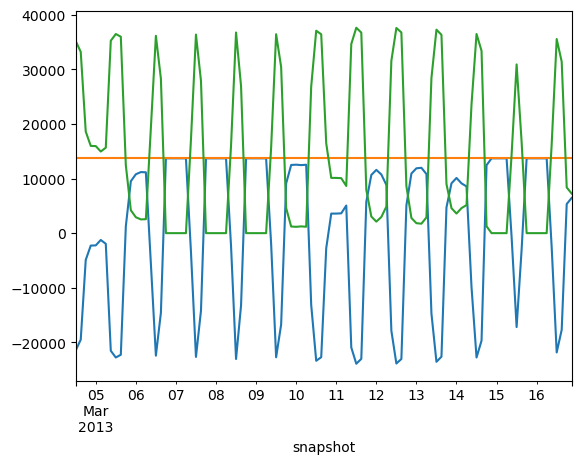

In [130]:
# Show storage levels and charging of 200 time steps
time_min = 500
time_max = 600
n.stores_t.p["H2 export store"][time_min:time_max].plot()
#n.stores_t.e["H2 export store"][time_min:time_max].plot()
n.loads_t.p["H2 export load"][time_min:time_max].plot()
export_supply = (n.links_t.p1.loc[:, n.links_t.p1.columns.str.contains("export")].sum(axis=1)[time_min:time_max]*(-1)) #.plot()
export_supply.plot()

<AxesSubplot:xlabel='snapshot'>

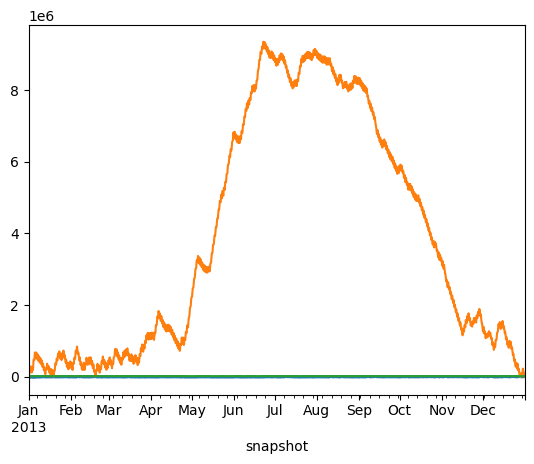

In [127]:
# Show storage levels and charging of 200 time steps
n.stores_t.p["H2 export store"].plot()
n.stores_t.e["H2 export store"].plot() #[2000:2200].plot()
n.loads_t.p["H2 export load"].plot()